  # H&M 개인화 패션 추천 데이터 분석 프로젝트







  ## 프로젝트 개요



  H&M Group은 53개 온라인 시장과 약 4,850개의 매장을 운영하는 패션 기업입니다.



  이 프로젝트에서는 고객의 구매 이력, 고객 정보, 제품 메타데이터를 활용하여



  고객 행동 패턴을 분석하고 재구매를 예측하는 모델을 개발합니다.







  ### 데이터셋 구성



  - **articles**: 105,542개 제품 정보 (제품 타입, 색상, 카테고리 등)



  - **customers**: 1,048,575명 고객 정보 (연령, 회원 상태, 활동 여부 등)



  - **transactions**: 1,048,575건 거래 내역 (구매일, 가격, 채널 등)

  ## 비즈니스 문제 정의







  ### 현재 상황



  - H&M은 다양한 제품을 보유하고 있지만, 고객이 자신에게 맞는 제품을 찾기 어려움



  - 부적절한 추천은 반품 증가로 이어져 배송 비용과 탄소 배출 증가



  - 고객의 재구매율이 낮아 장기적인 충성도 확보가 어려움







  ### 비즈니스 이슈



  - 고객별 맞춤 추천 시스템이 부족



  - 재구매 고객과 일회성 고객의 특성 파악 필요



  - 채널별, 고객 세그먼트별 구매 패턴 이해 부족







  ### 해결 필요성



  - 개인화된 제품 추천으로 고객 만족도 향상



  - 재구매율 증가를 통한 매출 증대



  - 반품 감소로 환경 영향 최소화







  ### 데이터로 답할 수 있는 질문







  #### 주요 질문



  **"어떤 고객이 재구매를 할 가능성이 높은가?"**







  #### 세부 질문



  1. Active 고객과 비Active 고객의 구매 패턴은 어떻게 다른가?



  2. 온라인과 오프라인 채널의 구매액에 차이가 있는가?



  3. 연령대별로 선호하는 제품 카테고리가 다른가?



  4. 회원 상태에 따라 구매 채널 선호도가 다른가?



  5. 제품 부서(department)별로 가격 차이가 있는가?



  6. 재구매 고객의 특징은 무엇인가?







  ### 분석 목표 및 KPI 설정







  #### 분석 목표



  1. 고객 구매 패턴 분석 및 세그먼트 발견



  2. 통계적 가설검정을 통한 주요 차이 검증



  3. 재구매 예측 모델 구축







  #### 비즈니스 KPI



  - **재구매율**: 2회 이상 구매한 고객 비율



  - **고객당 평균 구매액**: ARPU (Average Revenue Per User)

  ---



  # 0️⃣ 프로젝트 개요 및 환경 설정

  ## 0.1 라이브러리 설치 및 Import

In [41]:
# 필요한 라이브러리 설치 (처음 한 번만 실행)
!pip install numpy pandas matplotlib seaborn scipy scikit-learn statsmodels pingouin scikit_posthocs xgboost -q

print("라이브러리 설치 완료!")

라이브러리 설치 완료!


In [42]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency, f_oneway
from scipy.stats import mannwhitneyu, fisher_exact, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import pingouin as pg
import scikit_posthocs as sp

# 출력 설정
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

# 시드 설정
np.random.seed(42) # 팀원간의 결과물이 동일하게 보일 수 있음

print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)


라이브러리 로드 완료!
한글 폰트 설정 완료!


  ## 0.2 데이터 로드

In [43]:
# 데이터 로드
df_articles = pd.read_csv('./data/articles_hm.csv')
df_customers = pd.read_csv('./data/customer_hm.csv')
df_transactions = pd.read_csv('./data/transactions_hm.csv')

print("="*60)
print("데이터 로드 완료!")
print("="*60)
print(f"\nArticles: {df_articles.shape}")
print(f"Customers: {df_customers.shape}")
print(f"Transactions: {df_transactions.shape}")


데이터 로드 완료!

Articles: (105542, 25)
Customers: (1048575, 6)
Transactions: (1048575, 5)


  ---



  # 1️⃣ 데이터 이해 (Data Understanding)

  ## 1.1 데이터 구조 파악

In [44]:
print("\n" + "="*60)
print("1. Articles 데이터 (제품 정보)")
print("="*60)
print(f"Shape: {df_articles.shape}")
print("\n[Data Info]")
df_articles.info()



1. Articles 데이터 (제품 정보)
Shape: (105542, 25)

[Data Info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  

In [ ]:
print("\n" + "="*60)
print("2. Customers 데이터 (고객 정보)")
print("="*60)
print(f"Shape: {df_customers.shape}")
print("\n[Data Info]")
df_customers.info()


2. Customers 데이터 (고객 정보)
Shape: (1048575, 6)

[Data Info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   customer_id             1048575 non-null  object
 1   FN                      1048575 non-null  int64 
 2   Active                  1048575 non-null  int64 
 3   club_member_status      1048575 non-null  object
 4   fashion_news_frequency  1048574 non-null  object
 5   age                     1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB


In [46]:
print("\n" + "="*60)
print("3. Transactions 데이터 (거래 내역)")
print("="*60)
print(f"Shape: {df_transactions.shape}")
print("\n[Data Info]")
df_transactions.info()


3. Transactions 데이터 (거래 내역)
Shape: (1048575, 5)

[Data Info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  object 
 1   customer_id       1048575 non-null  object 
 2   article_id        1048575 non-null  int64  
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 40.0+ MB


 ![ERD](./ERD.png)

  ## 1.2 컬럼별 의미 및 데이터 타입 확인

In [47]:
# ============================================================
# Articles 주요 컬럼 설명
# ============================================================
# • article_id                    : 제품 고유 ID
# • product_code                  : 제품 코드
# • prod_name                     : 제품명
# • product_type_name             : 제품 타입 (예: 티셔츠, 드레스)
# • product_group_name            : 제품 그룹
# • colour_group_name             : 색상 그룹
# • department_name               : 부서/카테고리
# • index_name                    : 인덱스 분류
# • section_name                  : 섹션 분류
# • garment_group_name            : 의류 그룹
# • detail_desc                   : 상세 설명


# ============================================================
# Customers 주요 컬럼 설명
# ============================================================
# • customer_id                   : 고객 고유 ID
# • FN                            : Fashion News (뉴스레터 수신 여부)
# • Active                        : 활성 고객 여부 (0: 비활성, 1: 활성)
# • club_member_status            : 클럽 회원 상태
# • fashion_news_frequency        : 뉴스레터 수신 빈도
# • age                           : 고객 연령


# ============================================================
# Transactions 주요 컬럼 설명
# ============================================================
# • t_dat                         : 거래 날짜
# • customer_id                   : 고객 ID (FK)
# • article_id                    : 제품 ID (FK)
# • price                         : 거래 가격
# • sales_channel_id              : 판매 채널 (1: 온라인, 2: 오프라인)


  ## 1.3 기초 통계량 확인

In [ ]:
print("\n" + "="*60)
print("Articles 기초 통계")
print("="*60)
display(df_articles.describe(include='all').T)


Articles 기초 통계


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
article_id,105542.0,NaN,NaN,NaN,698424569.096919,128462381.336161,108775015.0,616992501.0,702213001.5,796703001.75,959461001.0
product_code,105542.0,NaN,NaN,NaN,698424.563378,128462.384432,108775.0,616992.5,702213.0,796703.0,959461.0
prod_name,105542,45875,Dragonfly dress,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type_no,105542.0,NaN,NaN,NaN,234.861875,75.049308,-1.0,252.0,259.0,272.0,762.0
product_type_name,105542,131,Trousers,11169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_group_name,105542,19,Garment Upper body,42741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
graphical_appearance_no,105542.0,NaN,NaN,NaN,1009515.075723,22413.585778,-1.0,1010008.0,1010016.0,1010016.0,1010029.0
graphical_appearance_name,105542,30,Solid,49747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
colour_group_code,105542.0,NaN,NaN,NaN,32.233822,28.086154,-1.0,9.0,14.0,52.0,93.0
colour_group_name,105542,50,Black,22670,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("\n" + "="*60)
print("Customers 기초 통계")
print("="*60)
display(df_customers.describe())


Customers 기초 통계


,FN,Active,age
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.555397e-01,3.461326e-01,3.636919e+01
std,4.786767e-01,4.757363e-01,1.430899e+01
min,0.000000e+00,0.000000e+00,1.600000e+01
25%,0.000000e+00,0.000000e+00,2.400000e+01
50%,0.000000e+00,0.000000e+00,3.200000e+01
75%,1.000000e+00,1.000000e+00,4.900000e+01
max,1.000000e+00,1.000000e+00,9.900000e+01


In [ ]:
print("\n" + "="*60)
print("Transactions 기초 통계")
print("="*60)
display(df_transactions.describe())


Transactions 기초 통계


,article_id,price,sales_channel_id
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.746672e+08,2.777915e-02,1.695412e+00
std,1.173503e+08,1.935764e-02,4.602328e-01
min,1.087750e+08,2.372880e-04,1.000000e+00
25%,6.289790e+08,1.523729e-02,1.000000e+00
50%,7.059880e+08,2.540678e-02,2.000000e+00
75%,7.500700e+08,3.388136e-02,2.000000e+00
max,8.797400e+08,5.067797e-01,2.000000e+00


  ## 1.4 샘플 데이터 확인

In [ ]:
# 출력 옵션 지정
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
pd.set_option('display.max_rows', 100000)       # 최대 100000행까지 표시

In [12]:
print("\n" + "="*60)
print("Articles 샘플 데이터")
print("="*60)
display(df_articles.head())



Articles 샘플 데이터


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [13]:
print("\n" + "="*60)
print("Customers 샘플 데이터")
print("="*60)
display(df_customers.head())



Customers 샘플 데이터


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


In [14]:
print("\n" + "="*60)
print("Transactions 샘플 데이터")
print("="*60)
display(df_transactions.head())



Transactions 샘플 데이터


,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1


  ---



  # 2️⃣ 데이터 전처리 (Data Preprocessing)

  ## 2.1 데이터 정제

  ### 2.1.1 중복 데이터 확인

In [15]:
print("\n" + "="*60)
print("중복 데이터 확인")
print("="*60)

# 전체 행 중복 확인
print("\n[전체 행 기준 중복]")
print(f"Articles 중복: {df_articles.duplicated().sum():,}건")
print(f"Customers 중복: {df_customers.duplicated().sum():,}건")
print(f"Transactions 중복: {df_transactions.duplicated().sum():,}건")

# ID 기준 중복 확인
print("\n[ID 기준 중복]")
articles_id_dup = df_articles.duplicated(subset=['article_id']).sum()
customers_id_dup = df_customers.duplicated(subset=['customer_id']).sum()

print(f"Articles (article_id 중복): {articles_id_dup:,}건")
print(f"Customers (customer_id 중복): {customers_id_dup:,}건")

# 중복 데이터 상세 확인 (있을 경우)
if articles_id_dup > 0:
    print(f"\n[Articles ID 중복 샘플]")
    dup_articles = df_articles[df_articles.duplicated(subset=['article_id'], keep=False)] # keep=False: 중복된 모든 행을 True로 표시 (첫 번째 행도 포함)
    dup_article_ids = dup_articles['article_id'].value_counts().head(3)
    print(f"중복된 article_id 예시:")
    for aid, count in dup_article_ids.items():
        print(f"  • article_id {aid}: {count}개")
        display(df_articles[df_articles['article_id'] == aid].head(3))

if customers_id_dup > 0:
    print(f"\n[Customers ID 중복 샘플]")
    dup_customers = df_customers[df_customers.duplicated(subset=['customer_id'], keep=False)] # keep=False: 중복된 모든 행을 True로 표시 (첫 번째 행도 포함)
    dup_customer_ids = dup_customers['customer_id'].value_counts().head(3)
    print(f"중복된 customer_id 예시:")
    for cid, count in dup_customer_ids.items():
        print(f"  • customer_id {cid}: {count}개")
        display(df_customers[df_customers['customer_id'] == cid].head(3))



중복 데이터 확인

[전체 행 기준 중복]
Articles 중복: 0건
Customers 중복: 0건
Transactions 중복: 8,474건

[ID 기준 중복]
Articles (article_id 중복): 0건
Customers (customer_id 중복): 0건


In [16]:
print("\n" + "="*60)
print("중복 제거")
print("="*60)

# 제거 전 크기
articles_before = len(df_articles)
customers_before = len(df_customers)
transactions_before = len(df_transactions)

# Articles: article_id 기준 중복 제거 (첫 번째 행 유지)
df_articles = df_articles.drop_duplicates(subset=['article_id'], keep='first')

# Customers: customer_id 기준 중복 제거 (첫 번째 행 유지)
df_customers = df_customers.drop_duplicates(subset=['customer_id'], keep='first')

# Transactions: 전체 행 기준 중복 제거 (동일한 거래는 중복일 수 있음)
df_transactions = df_transactions.drop_duplicates(keep='first')

# 제거 결과
print(f"\n[Articles]")
print(f"  제거 전: {articles_before:,}건")
print(f"  제거 후: {len(df_articles):,}건")
print(f"  제거된 행: {articles_before - len(df_articles):,}건")

print(f"\n[Customers]")
print(f"  제거 전: {customers_before:,}건")
print(f"  제거 후: {len(df_customers):,}건")
print(f"  제거된 행: {customers_before - len(df_customers):,}건")

print(f"\n[Transactions]")
print(f"  제거 전: {transactions_before:,}건")
print(f"  제거 후: {len(df_transactions):,}건")
print(f"  제거된 행: {transactions_before - len(df_transactions):,}건")

print("\n 중복 제거 완료")



중복 제거

[Articles]
  제거 전: 105,542건
  제거 후: 105,542건
  제거된 행: 0건

[Customers]
  제거 전: 1,048,575건
  제거 후: 1,048,575건
  제거된 행: 0건

[Transactions]
  제거 전: 1,048,575건
  제거 후: 1,040,101건
  제거된 행: 8,474건

 중복 제거 완료


  ### 2.1.2 데이터 타입 변환

In [ ]:
print("\n" + "="*60)
print("데이터 타입 변환")
print("="*60)

# Transactions: 날짜 형식 변환
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])
print(" 거래일자(t_dat)를 datetime 형식으로 변환")

# Customers: 범주형 변수 변환
categorical_cols = ['club_member_status', 'fashion_news_frequency']
for col in categorical_cols:
    if col in df_customers.columns:
        df_customers[col] = df_customers[col].astype('category')
print(" 고객 정보의 범주형 변수 변환 완료")

# Articles: 범주형 변수 변환
articles_categorical = ['product_type_name', 'product_group_name', 
                        'colour_group_name', 'department_name',
                        'index_name', 'section_name', 'garment_group_name']
for col in articles_categorical:
    if col in df_articles.columns:
        df_articles[col] = df_articles[col].astype('category')
print(" 제품 정보의 범주형 변수 변환 완료")

# 범주형 변수와 문자형 변수의 차이
# 범주형 변수 -> Unique 범주 개수가 정해져있음 (혈액형, 학점)
# 문자형 변수 -> 이름 -> 범주 개수가 ???


데이터 타입 변환
 거래일자(t_dat)를 datetime 형식으로 변환
 고객 정보의 범주형 변수 변환 완료
 제품 정보의 범주형 변수 변환 완료


  ### 2.1.3 컬럼명 정제

In [ ]:
# 컬럼명 소문자 변환 및 공백 제거
df_articles.columns = df_articles.columns.str.lower().str.strip()
df_customers.columns = df_customers.columns.str.lower().str.strip()
df_transactions.columns = df_transactions.columns.str.lower().str.strip()

#컬럼명을 보기 좋게 한글로 바꿔도 좋음

print(" 컬럼명 정제 완료 (소문자 변환)")

 컬럼명 정제 완료 (소문자 변환)


  ## 2.2 데이터 병합

In [19]:
print("\n" + "="*60)
print("데이터 병합")
print("="*60)

# Transactions + Articles 병합
# how='left': Transactions의 모든 행을 유지 (제품 정보 없어도 거래 기록 보존)
# how='inner': 양쪽 모두 있는 행만 유지 (제품 정보 없는 거래는 제거)
df_trans_articles = df_transactions.merge(
    df_articles,
    on='article_id',
    how='left'
)
print(f" Transactions + Articles 병합 완료: {df_trans_articles.shape}")

# Transactions + Articles + Customers 병합
# how='left': 모든 거래를 유지 (고객 정보 없어도 거래 기록 보존)
# how='inner': 고객 정보 있는 거래만 유지
df_full = df_trans_articles.merge(
    df_customers,
    on='customer_id',
    how='left'
)
print(f" 전체 데이터 병합 완료: {df_full.shape}")

# 병합 후 중복 확인
duplicates = df_full.duplicated().sum()
if duplicates > 0:
    df_full = df_full.drop_duplicates()
    print(f" 병합 후 중복 {duplicates}건 제거")



데이터 병합
 Transactions + Articles 병합 완료: (1040101, 29)
 전체 데이터 병합 완료: (1040101, 34)


  ## 2.3 결측치 처리

In [20]:
print("\n" + "="*60)
print("결측치 확인")
print("="*60)

# 결측치 개수 및 비율
missing_df = pd.DataFrame({
    '결측수': df_full.isnull().sum(),
    '결측비율(%)': (df_full.isnull().sum() / len(df_full) * 100).round(2)
})
missing_df = missing_df[missing_df['결측수'] > 0].sort_values('결측수', ascending=False)

if len(missing_df) > 0:
    print("\n[결측치 현황]")
    display(missing_df)
else:
    print("\n결측치 없음")



결측치 확인

[결측치 현황]


,결측수,결측비율(%)
fn,233734,22.47
active,233734,22.47
fashion_news_frequency,233734,22.47
club_member_status,233734,22.47
age,233734,22.47
detail_desc,4505,0.43


In [21]:
# 결측치 처리
print("\n" + "="*60)
print("결측치 처리")
print("="*60)

# fashion_news_frequency: 결측치를 'NONE'으로 대체
if 'fashion_news_frequency' in df_full.columns:
    df_full['fashion_news_frequency'].fillna('NONE', inplace=True)
    print(" fashion_news_frequency 결측치 처리 완료")

# 수치형 변수의 결측치는 중앙값으로 대체
numeric_cols = df_full.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_full[col].isnull().sum() > 0:
        median_val = df_full[col].median()
        df_full[col].fillna(median_val, inplace=True)
        print(f" {col} 결측치를 중앙값({median_val:.2f})으로 대체")

print("\n 결측치 처리 완료")
print(f"최종 데이터 shape: {df_full.shape}")



결측치 처리
 fashion_news_frequency 결측치 처리 완료
 fn 결측치를 중앙값(0.00)으로 대체
 active 결측치를 중앙값(0.00)으로 대체
 age 결측치를 중앙값(32.00)으로 대체

 결측치 처리 완료
최종 데이터 shape: (1040101, 34)


  ## 2.4 이상치 처리

  ### 2.4.1 가격(price) 이상치 확인

In [22]:
print("\n" + "="*60)
print("가격(price) 이상치 분석")
print("="*60)

# 기초 통계
print("\n[가격 기초 통계]")
print(df_full['price'].describe())

# 전체 범위 확인
print(f"\n가격 범위: {df_transactions['price'].min():.4f} ~ {df_transactions['price'].max():.4f}")

# 왜도와 첨도
from scipy.stats import skew, kurtosis
price_skew = skew(df_full['price'])
price_kurt = kurtosis(df_full['price'])
print(f"\n왜도(Skewness): {price_skew:.3f}")
print(f"첨도(Kurtosis): {price_kurt:.3f}")


print("\n[가격 샘플 (최소~최대)]")
print("최소값 10개:")
display(df_transactions.nsmallest(10, 'price')[['customer_id', 'article_id', 'price']])

print("\n최대값 10개:")
display(df_transactions.nlargest(10, 'price')[['customer_id', 'article_id', 'price']])

# 가격은 정규화된 값 (0~1 사이로 스케일링)



가격(price) 이상치 분석

[가격 기초 통계]
count    1.040101e+06
mean     2.778278e-02
std      1.935509e-02
min      2.372880e-04
25%      1.523729e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.067797e-01
Name: price, dtype: float64

가격 범위: 0.0002 ~ 0.5068

왜도(Skewness): 3.041
첨도(Kurtosis): 23.591

[가격 샘플 (최소~최대)]
최소값 10개:


,customer_id,article_id,price
515411,7a5c44a03fdb15381dd0e11c4f8adb7014ea3ebd08bffe...,594978016,0.000237
273822,c7ea962c8735b01fefbaf5d671fab41e3f03d3e504459a...,214844001,0.000254
425290,da8869c409ec54daf7536c6ad653785af206fe759078e1...,550021002,0.000322
546020,c0122cfc8e3488db0f9696c39ad1085affdc9a8b2c9544...,836231001,0.000322
826387,5bf72489b764601f988323a66753737466cc87faf1a275...,742947002,0.000322
831684,ad4ba5ec3d58cda30ef8125b3f00852af78e095638627a...,659832007,0.000339
895295,776eb8615fb101c7ea147c519c86195a898dce74f2ee6e...,742947001,0.000339
709344,5f3ccb57ec77f1134c6f21740791a116622379bfb492a0...,146721001,0.000373
293479,6ea784449ea1c3ae6fcfcb97f1a4f42f11747d400d1527...,529012024,0.000390
886475,6208fba15e043caec6abda48acdfcabaa4474a1caa5258...,728444004,0.000407



최대값 10개:


,customer_id,article_id,price
387710,dbd951ff39a42928fad44d160dfcd30fee4806cd87ff6c...,810872001,0.506780
782853,7dccf8ad631ff31c86665fee7146bab577f07fdf17b87b...,547718001,0.506780
37776,81bd1cfd3cb80d0d6654bf8c639c7387e199a6e6d718e3...,780031001,0.422034
42458,9f9ea34ffb1ac59fb29541d8c46bf70fdfa6028ce2268f...,780031002,0.422034
52586,d0459a6ef5a49380d6f0dae5e74e7dae31132a0059656b...,735572001,0.422034
103476,2517d474f897b8ba2ee21e77c6f5f67aef9599276cd218...,798250001,0.422034
107278,9769801bb6a8225b1c34feb65f645e196003a3fc8b5613...,639338001,0.422034
120312,8105e8a1d4597166400054b8b9f789a3ef595dcef397ad...,737612001,0.422034
148940,6188ba6e6515ef599c91bff51a249b184052b68825a558...,776716001,0.422034
157724,60b089fad3b82437a6c9959d09918e37ee6f5d1ab51c80...,779951002,0.422034


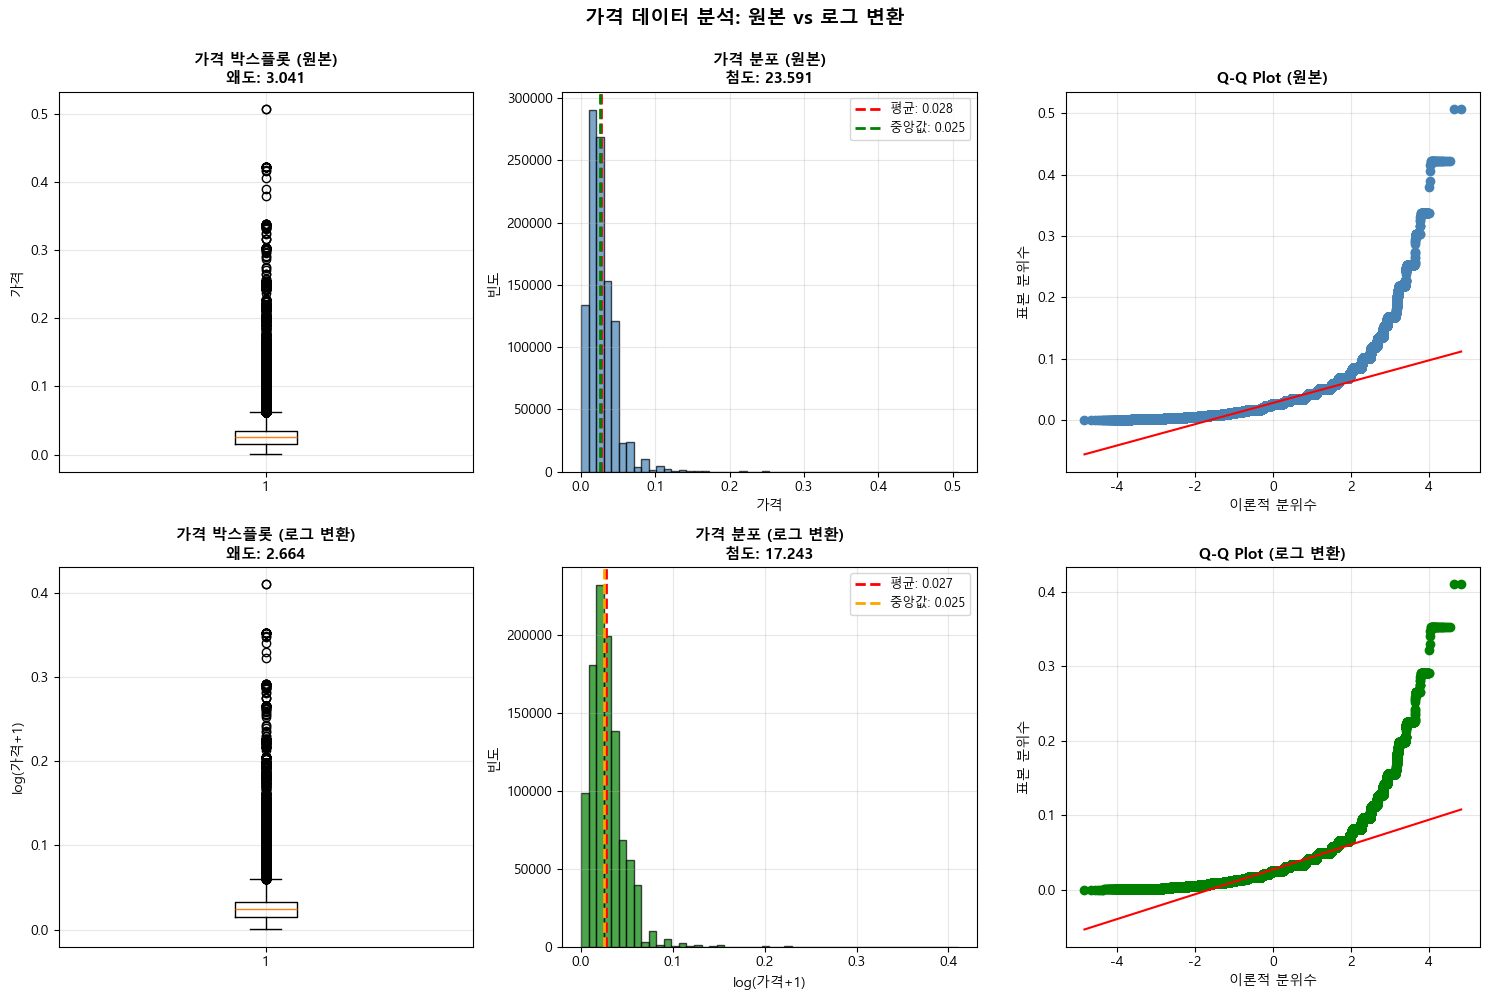

In [23]:
# 시각화 - 원본 vs 로그 변환 비교
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 로그 변환
price_log = np.log1p(df_full['price'])  # log(price + 1)

# 로그 변환 후 왜도와 첨도
price_log_skew = skew(price_log)
price_log_kurt = kurtosis(price_log)

# ============================================================================
# 첫 번째 행: 원본 데이터
# ============================================================================

# 1. 박스플롯 (원본)
axes[0, 0].boxplot(df_full['price'])
axes[0, 0].set_title(f'가격 박스플롯 (원본)\n왜도: {price_skew:.3f}', 
                     fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('가격')
axes[0, 0].grid(True, alpha=0.3)

# 2. 히스토그램 (원본)
axes[0, 1].hist(df_full['price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].axvline(df_full['price'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'평균: {df_full["price"].mean():.3f}')
axes[0, 1].axvline(df_full['price'].median(), color='green', linestyle='--',
                    linewidth=2, label=f'중앙값: {df_full["price"].median():.3f}')
axes[0, 1].set_title(f'가격 분포 (원본)\n첨도: {price_kurt:.3f}', 
                     fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('가격')
axes[0, 1].set_ylabel('빈도')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q plot (원본)
stats.probplot(df_full['price'], dist="norm", plot=axes[0, 2])
axes[0, 2].get_lines()[0].set_markerfacecolor('steelblue')  # 점 색상 통일
axes[0, 2].get_lines()[0].set_markeredgecolor('steelblue')
axes[0, 2].set_title('Q-Q Plot (원본)', fontsize=11, fontweight='bold')
axes[0, 2].set_xlabel('이론적 분위수')
axes[0, 2].set_ylabel('표본 분위수')
axes[0, 2].grid(True, alpha=0.3)

# ============================================================================
# 두 번째 행: 로그 변환 데이터
# ============================================================================

# 1. 박스플롯 (로그)
axes[1, 0].boxplot(price_log)
axes[1, 0].set_title(f'가격 박스플롯 (로그 변환)\n왜도: {price_log_skew:.3f}', 
                     fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('log(가격+1)')
axes[1, 0].grid(True, alpha=0.3)

# 2. 히스토그램 (로그)
axes[1, 1].hist(price_log, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(price_log.mean(), color='red', linestyle='--',
                    linewidth=2, label=f'평균: {price_log.mean():.3f}')
axes[1, 1].axvline(price_log.median(), color='orange', linestyle='--',
                    linewidth=2, label=f'중앙값: {price_log.median():.3f}')
axes[1, 1].set_title(f'가격 분포 (로그 변환)\n첨도: {price_log_kurt:.3f}', 
                     fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('log(가격+1)')
axes[1, 1].set_ylabel('빈도')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

# 3. Q-Q plot (로그)
stats.probplot(price_log, dist="norm", plot=axes[1, 2])
axes[1, 2].get_lines()[0].set_markerfacecolor('green')  # 점 색상 통일
axes[1, 2].get_lines()[0].set_markeredgecolor('green')
axes[1, 2].set_title('Q-Q Plot (로그 변환)', fontsize=11, fontweight='bold')
axes[1, 2].set_xlabel('이론적 분위수')
axes[1, 2].set_ylabel('표본 분위수')
axes[1, 2].grid(True, alpha=0.3)

# 전체 제목
fig.suptitle('가격 데이터 분석: 원본 vs 로그 변환', fontsize=14, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


In [24]:
# IQR 방법으로 이상치 탐지
Q1 = df_full['price'].quantile(0.25)
Q3 = df_full['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_full[(df_full['price'] < lower_bound) | (df_full['price'] > upper_bound)]

print(f"\n[IQR 기반 이상치]")
print(f"하한: {lower_bound:.2f}")
print(f"상한: {upper_bound:.2f}")
print(f"이상치 개수: {len(outliers):,}개 ({len(outliers)/len(df_full)*100:.2f}%)")

# 도메인 지식 기반 이상치
extreme_price = df_full[df_full['price'] <= 0]
print(f"\n[도메인 지식 기반]")
print(f"0 이하 가격: {len(extreme_price):,}개")



[IQR 기반 이상치]
하한: -0.01
상한: 0.06
이상치 개수: 49,452개 (4.75%)

[도메인 지식 기반]
0 이하 가격: 0개


In [25]:
# 이상치 처리: 0 이하 가격 제거
print("\n" + "="*60)
print("이상치 처리")
print("="*60)

original_len = len(df_full)

# 0 이하 가격 제거
df_full = df_full[df_full['price'] > 0]

# 극단적 상한값 처리 (99.5 백분위수로 대치)
price_cap = df_full['price'].quantile(0.995)
df_full.loc[df_full['price'] > price_cap, 'price'] = price_cap

removed = original_len - len(df_full)
print(f" 0 이하 가격 제거: {removed:,}건")
print(f" 상위 0.5% 가격: {price_cap:.2f}")
print(f" 최종 데이터: {len(df_full):,}건")




이상치 처리
 0 이하 가격 제거: 0건
 상위 0.5% 가격: 0.12
 최종 데이터: 1,040,101건


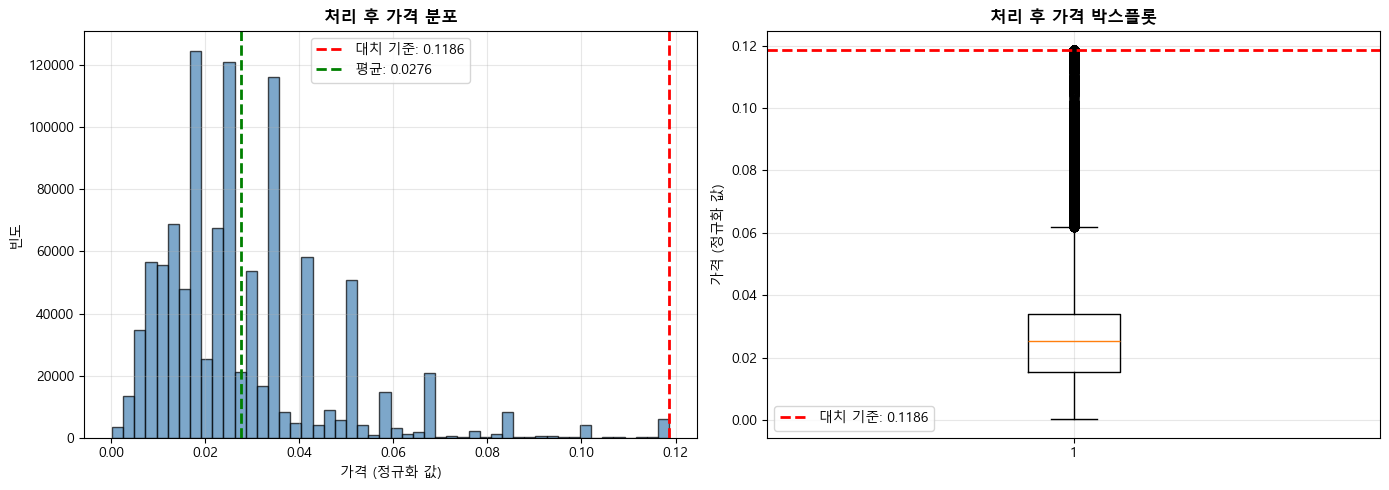

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 처리 후 - 히스토그램
axes[0].hist(df_full['price'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(price_cap, color='red', linestyle='--', linewidth=2, 
                label=f'대치 기준: {price_cap:.4f}')
axes[0].axvline(df_full['price'].mean(), color='green', linestyle='--', linewidth=2,
                label=f'평균: {df_full["price"].mean():.4f}')
axes[0].set_title('처리 후 가격 분포', fontsize=12, fontweight='bold')
axes[0].set_xlabel('가격 (정규화 값)')
axes[0].set_ylabel('빈도')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 처리 후 - 박스플롯
axes[1].boxplot(df_full['price'])
axes[1].axhline(price_cap, color='red', linestyle='--', linewidth=2,
                label=f'대치 기준: {price_cap:.4f}')
axes[1].set_title('처리 후 가격 박스플롯', fontsize=12, fontweight='bold')
axes[1].set_ylabel('가격 (정규화 값)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


  ### 2.4.2 연령(age) 이상치 확인


연령(age) 이상치 분석

[연령 기초 통계]
count    1.040101e+06
mean     3.538366e+01
std      1.159864e+01
min      1.600000e+01
25%      2.700000e+01
50%      3.200000e+01
75%      4.300000e+01
max      9.900000e+01
Name: age, dtype: float64


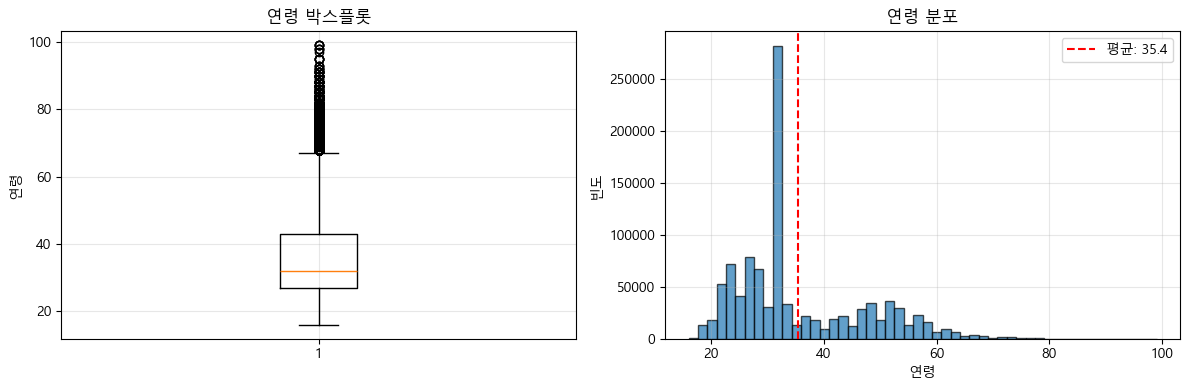


3세 미만 또는 100세 초과: 0명


In [27]:
print("\n" + "="*60)
print("연령(age) 이상치 분석")
print("="*60)

print("\n[연령 기초 통계]")
print(df_full['age'].describe())

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(df_full['age'])
axes[0].set_title('연령 박스플롯')
axes[0].set_ylabel('연령')
axes[0].grid(True, alpha=0.3)

axes[1].hist(df_full['age'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('연령 분포')
axes[1].set_xlabel('연령')
axes[1].set_ylabel('빈도')
axes[1].axvline(df_full['age'].mean(), color='red', linestyle='--', label=f'평균: {df_full["age"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 비현실적 연령 확인
extreme_age = df_full[(df_full['age'] < 3) | (df_full['age'] > 100)]
print(f"\n3세 미만 또는 100세 초과: {len(extreme_age):,}명")


In [28]:
# 연령 이상치 처리
print("\n" + "="*60)
print("연령 이상치 처리")
print("="*60)

original_len = len(df_full)

# 3세 미만, 100세 초과 제거
df_full = df_full[(df_full['age'] >= 3) & (df_full['age'] <= 100)]

removed = original_len - len(df_full)
print(f" 비현실적 연령 제거: {removed:,}건")
print(f" 최종 데이터: {len(df_full):,}건")



연령 이상치 처리
 비현실적 연령 제거: 0건
 최종 데이터: 1,040,101건


  ## 2.5 파생변수 생성

  ### 2.5.1 시간 관련 변수

In [29]:
print("\n" + "="*60)
print("시간 관련 파생변수 생성")
print("="*60)

# 날짜 관련 변수
df_full['year'] = df_full['t_dat'].dt.year
df_full['month'] = df_full['t_dat'].dt.month
df_full['day'] = df_full['t_dat'].dt.day
df_full['dayofweek'] = df_full['t_dat'].dt.dayofweek  # 0=월요일, 6=일요일
df_full['quarter'] = df_full['t_dat'].dt.quarter

# 요일명
df_full['dayname'] = df_full['t_dat'].dt.day_name()

# 주말 여부
df_full['is_weekend'] = df_full['dayofweek'].isin([5, 6]).astype(int)

print(" 생성된 변수: year, month, day, dayofweek, quarter, dayname, is_weekend")
print(f" 데이터 기간: {df_full['t_dat'].min()} ~ {df_full['t_dat'].max()}")



시간 관련 파생변수 생성
 생성된 변수: year, month, day, dayofweek, quarter, dayname, is_weekend
 데이터 기간: 2019-01-01 00:00:00 ~ 2019-12-31 00:00:00


  ### 2.5.2 연령대 구간화

In [30]:
print("\n" + "="*60)
print("연령대 구간화")
print("="*60)

# 연령대 생성
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대', '20대', '30대', '40대', '50대', '60대이상']
df_full['age_group'] = pd.cut(df_full['age'], bins=bins, labels=labels, right=False)

print(" 연령대 그룹 생성 완료")
print("\n[연령대별 분포]")
print(df_full['age_group'].value_counts().sort_index())



연령대 구간화
 연령대 그룹 생성 완료

[연령대별 분포]
age_group
10대       13641
20대      329534
30대      398191
40대      125774
50대      135167
60대이상     37794
Name: count, dtype: int64


  ### 2.5.3 고객별 RFM 변수

In [31]:
print("\n" + "="*60)
print("고객별 RFM 변수 생성")
print("="*60)

# 기준 날짜 설정 (데이터의 마지막 날짜 다음날)
reference_date = df_full['t_dat'].max() + timedelta(days=1)

# 고객별 RFM 계산
rfm = df_full.groupby('customer_id').agg({
    't_dat': lambda x: (reference_date - x.max()).days,  # Recency
    'article_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

print(" RFM 변수 계산 완료")
print("\n[RFM 통계]")
display(rfm.describe())



고객별 RFM 변수 생성
 RFM 변수 계산 완료

[RFM 통계]


,recency,frequency,monetary
count,458235.000000,458235.000000,458235.000000
mean,153.169489,2.269798,0.062642
std,100.524268,2.143803,0.070858
min,1.000000,1.000000,0.000339
25%,65.000000,1.000000,0.022017
50%,150.000000,1.000000,0.040661
75%,227.000000,3.000000,0.076237
max,365.000000,59.000000,1.961881


In [32]:
# RFM을 원본 데이터에 병합
df_full = df_full.merge(rfm, on='customer_id', how='left')

print(" RFM 변수를 원본 데이터에 병합 완료")


 RFM 변수를 원본 데이터에 병합 완료


  ### 2.5.4 고객별 구매 통계

In [33]:
print("\n" + "="*60)
print("고객별 구매 통계 생성")
print("="*60)

# 고객별 집계
customer_stats = df_full.groupby('customer_id').agg({
    'price': ['sum', 'mean', 'std', 'count'],
    'article_id': 'nunique',  # 구매한 고유 제품 수
    't_dat': ['min', 'max']
}).reset_index()

# 컬럼명 정리
customer_stats.columns = ['customer_id', 'total_purchase', 'avg_purchase', 
                          'std_purchase', 'purchase_count', 
                          'unique_products', 'first_purchase', 'last_purchase']

# 고객 활동 기간
customer_stats['customer_lifetime'] = (customer_stats['last_purchase'] - 
                                        customer_stats['first_purchase']).dt.days

print(" 고객별 구매 통계 생성 완료")
print("\n[고객 통계 샘플]")
display(customer_stats.head())




고객별 구매 통계 생성
 고객별 구매 통계 생성 완료

[고객 통계 샘플]


,customer_id,total_purchase,avg_purchase,std_purchase,purchase_count,unique_products,first_purchase,last_purchase,customer_lifetime
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.105051,0.052525,0.002397,2,2,2019-05-25,2019-09-28,126
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.199898,0.033316,0.017340,6,6,2019-05-07,2019-08-12,97
2,000064249685c11552da43ef22a5030f35a147f723d5b0...,0.042356,0.042356,NaN,1,1,2019-10-02,2019-10-02,0
3,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,0.025407,0.025407,NaN,1,1,2019-06-04,2019-06-04,0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.324034,0.046291,0.044732,7,7,2019-01-06,2019-11-24,322


In [34]:
# 재구매 여부 (2회 이상 구매)
customer_stats['is_repeat'] = (customer_stats['purchase_count'] >= 2).astype(int)

# 재구매율 확인
repeat_rate = customer_stats['is_repeat'].mean() * 100
print(f"\n📊 전체 재구매율: {repeat_rate:.2f}%")
print(f"   - 재구매 고객: {customer_stats['is_repeat'].sum():,}명")
print(f"   - 일회성 고객: {(~customer_stats['is_repeat'].astype(bool)).sum():,}명")



📊 전체 재구매율: 49.80%
   - 재구매 고객: 228,195명
   - 일회성 고객: 230,040명


  ### 2.5.5 제품별 인기도 지표

In [35]:
print("\n" + "="*60)
print("제품별 인기도 지표 생성")
print("="*60)

# 제품별 판매량 및 매출
product_stats = df_full.groupby('article_id').agg({
    'customer_id': 'count',  # 판매 건수
    'price': ['sum', 'mean']
}).reset_index()

product_stats.columns = ['article_id', 'sales_count', 'total_revenue', 'avg_price']

# 제품 인기도 점수 (판매량 기준 정규화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
product_stats['popularity_score'] = scaler.fit_transform(product_stats[['sales_count']])

print(" 제품별 인기도 지표 생성 완료")
print("\n[인기 제품 TOP 10]")
display(product_stats.nlargest(10, 'sales_count'))



제품별 인기도 지표 생성
 제품별 인기도 지표 생성 완료

[인기 제품 TOP 10]


,article_id,sales_count,total_revenue,avg_price,popularity_score
28442,706016001,1785,57.383780,0.032148,1.000000
28443,706016002,1434,46.656492,0.032536,0.803251
930,372860001,970,12.519051,0.012906,0.543161
1997,464297007,841,13.596576,0.016167,0.470852
40601,759871002,806,4.000526,0.004963,0.451233
28444,706016003,805,26.182271,0.032525,0.450673
6253,562245046,796,24.981763,0.031384,0.445628
20561,673677002,780,16.991746,0.021784,0.436659
46,156231001,738,4.839492,0.006558,0.413117
20515,673396002,735,9.562119,0.013010,0.411435


In [36]:
# 제품 통계를 원본 데이터에 병합
df_full = df_full.merge(
    product_stats[['article_id', 'popularity_score']], 
    on='article_id', 
    how='left'
)

print(" 제품 인기도를 원본 데이터에 병합 완료")


 제품 인기도를 원본 데이터에 병합 완료


  ### 2.5.6 채널 변수 정리

In [37]:
print("\n" + "="*60)
print("판매 채널 변수 정리")
print("="*60)

# 채널명 매핑
channel_map = {1: 'Online', 2: 'Offline'}
df_full['channel'] = df_full['sales_channel_id'].map(channel_map)

print(" 판매 채널 이름 매핑 완료")
print("\n[채널별 거래 건수]")
print(df_full['channel'].value_counts())



판매 채널 변수 정리
 판매 채널 이름 매핑 완료

[채널별 거래 건수]
channel
Offline    721488
Online     318613
Name: count, dtype: int64


  ### 전처리 완료 - 최종 데이터 확인

In [38]:
print("\n" + "="*60)
print("전처리 완료 - 최종 데이터")
print("="*60)

print(f"\n최종 데이터 shape: {df_full.shape}")
print(df_full.info())



전처리 완료 - 최종 데이터

최종 데이터 shape: (1040101, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040101 entries, 0 to 1040100
Data columns (total 47 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   t_dat                         1040101 non-null  datetime64[ns]
 1   customer_id                   1040101 non-null  object        
 2   article_id                    1040101 non-null  int64         
 3   price                         1040101 non-null  float64       
 4   sales_channel_id              1040101 non-null  int64         
 5   product_code                  1040101 non-null  int64         
 6   prod_name                     1040101 non-null  object        
 7   product_type_no               1040101 non-null  int64         
 8   product_type_name             1040101 non-null  category      
 9   product_group_name            1040101 non-null  category      
 10  graphical_appearance

In [39]:
# 전처리된 데이터 샘플 확인
print("\n[전처리 완료 데이터 샘플]")
display(df_full.head(10))



[전처리 완료 데이터 샘플]


,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,fn,active,club_member_status,fashion_news_frequency,age,year,month,day,dayofweek,quarter,dayname,is_weekend,age_group,recency,frequency,monetary,popularity_score,channel
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,698328,ZEBRA CF TVP,252,Sweater,Garment Upper body,1010014,Placement print,73,Dark Blue,4,Dark,2,Blue,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,Top in lightweight sweatshirt fabric with drop...,1.0,1.0,ACTIVE,Regularly,51.0,2019,11,5,1,4,Tuesday,0,50대,57,7,0.227186,0.032511,Offline
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,760597,BUBBLE WRAP TOP,254,Top,Garment Upper body,1010017,Stripe,10,White,3,Light,9,White,1660,Jersey,A,Ladieswear,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,"Short-sleeved blouse in stretch, textured jers...",0.0,0.0,ACTIVE,NONE,28.0,2019,5,22,2,2,Wednesday,0,20대,224,3,0.067746,0.039238,Offline
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,488561,Teddy jogger.,274,Shorts,Garment Lower body,1010024,Chambray,73,Dark Blue,4,Dark,2,Blue,5658,Shorts,F,Menswear,3,Menswear,21,Contemporary Casual,1025,Shorts,Knee-length shorts in soft washed cotton with ...,1.0,1.0,ACTIVE,Regularly,37.0,2019,5,10,4,2,Friday,0,30대,236,1,0.016932,0.039238,Offline
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,682771,Yuki shopper,66,Bag,Accessories,1010016,Solid,9,Black,4,Dark,5,Black,3209,Bags,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Shopper in grained imitation leather with two ...,0.0,0.0,ACTIVE,NONE,19.0,2019,8,26,0,3,Monday,0,10대,128,1,0.033881,0.047085,Offline
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,742400,1pk Sportsock,302,Socks,Socks & Tights,1010001,All over pattern,10,White,3,Light,9,White,5999,Socks Wall,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, fine-knit cotton blend with r...",0.0,0.0,ACTIVE,NONE,35.0,2019,8,10,5,3,Saturday,1,30대,144,2,0.028627,0.014574,Online
5,2019-01-12,ef00c5c37b6edec253e58ba7be07aecc431742332bfc4b...,769400003,0.042356,2,769400,RR 47.1/2 /3Leo shirt dress,265,Dress,Garment Full body,1010001,All over pattern,9,Black,4,Dark,5,Black,4092,Read & React,D,Divided,2,Divided,50,Divided Projects,1001,Unknown,Long-sleeved dress in chiffon crêpe with a V-n...,0.0,0.0,NaN,NONE,32.0,2019,1,12,5,1,Saturday,1,30대,146,4,0.132136,0.018498,Offline
6,2019-03-22,437d51082dc72fe41289783e165a2a2a6958ec7bd980b4...,559634009,0.033881,2,559634,Timeless Padded Swimsuit,57,Swimsuit,Swimwear,1010017,Stripe,10,White,3,Light,9,White,4242,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,"Fully lined, V-neck swimsuit with lightly padd...",0.0,0.0,ACTIVE,NONE,20.0,2019,3,22,4,1,Friday,0,20대,285,1,0.033881,0.142937,Offline
7,2019-06-20,efbebbf26253e63d5030323bd9c5c4cb7795eb8005f899...,556625001,0.008458,2,556625,SANNA SLIP TANK,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1543,Tops Woven,D,Divided,2,Divided,53,Divided Collection,1010,Blouses,"Satin top with a V-neck front and back, narrow...",0.0,0.0,NaN,NONE,32.0,2019,6,20,3,2,Thursday,0,30대,195,2,0.033864,0.006166,Offline
8,2019-05-08,9d790a34fe05697c2af9c2456d9c2edadcdd42e54f0dda...,559634018,0.033881,2,559634,Timeless Padded Swimsuit,57,Swimsuit,Swimwear,1010001,All over pattern,13,Beige,2,Medium Dusty,11,Beige,4242,Swimwear

 ## 전처리 완료 데이터 저장

In [40]:
import os

# 폴더 생성 (없으면 자동 생성)
os.makedirs('./processed_data', exist_ok=True)
print("processed_data 폴더 확인/생성 완료")

# 전처리 데이터 저장
df_full.to_csv('./processed_data/df_full.csv', index=False, encoding='utf-8-sig')
print("df_full.csv 저장 완료")

# RFM 데이터 저장
rfm.to_csv('./processed_data/rfm.csv', index=False, encoding='utf-8-sig')
print("rfm.csv 저장 완료")

# 고객 통계 데이터 저장 
customer_stats.to_csv('./processed_data/customer_stats.csv', index=False, encoding='utf-8-sig')
print("customer_stats.csv 저장 완료")

# 제품 통계 저장
product_stats.to_csv('./processed_data/product_stats.csv', index=False, encoding='utf-8-sig')
print("product_stats.csv 저장 완료")

processed_data 폴더 확인/생성 완료
df_full.csv 저장 완료
rfm.csv 저장 완료
customer_stats.csv 저장 완료
product_stats.csv 저장 완료
